# Rapid EDA

#### Extract jobs from rapidapi

## Combine all JSON files into a single DataFrame

In [2]:
import os
import sys

import pandas as pd

from pipeline.rapid_transformer import RapidTransformer


sys.path.append(os.path.abspath("/Users/apoltavets/anna-apps/annalyticai/careear-stats/pipeline"))


initial = RapidTransformer(f'output/rapid/initial').normalize_json().df
extended = RapidTransformer(f'output/rapid/20250901').normalize_json().df
rapid = pd.concat([initial, extended], ignore_index=True)

(5063, 32)
Normalizing data...
4860
(12470, 34)
Normalizing data...
11732


In [25]:
import uuid

df = rapid.copy()


In [29]:
df1 = rapid.copy()



In [49]:
df1['job_publisher'].unique()

array(['Indeed', 'ZipRecruiter', 'ICF Career', 'CareerBuilder',
       'LinkedIn', 'Glassdoor', 'OPTnation', 'Talent.com', 'Lensa',
       'Dice', 'Jobs Trabajo.org', 'BeBee', 'Ace Technologies', 'WayUp',
       'MAIRA', 'Career.com', 'Talentify', 'Ladders', 'Yulys', 'Dice.com',
       'Learn4Good', 'Cone Health', 'Trabajo.org', 'Firenze Lodging',
       'Smart Recruiters Jobs', 'Marine Resale',
       'Holisticaproducciones.com.co', 'Leidos Careers',
       'Security Clearance Jobs', 'Addison Group', 'Clearance Jobs',
       'Freddie Mac Careers', 'Jobs By Workable', 'Marriott Careers',
       'Adtalem Careers - Adtalem Global Education', 'BigBear.ai Careers',
       'Motion Recruitment', 'Africa Cargo Logistics',
       'Garden Center Lanes', 'ClearedJobs.Net', 'Elika Mahony',
       'MilwaukeeJobs.com', 'Tential', 'Thomson Reuters Careers',
       'JSfirm.com', 'Monster', 'Dale WorkForce Solutions', 'KBR Careers',
       'APL Careers - Johns Hopkins University Applied Physics Labora

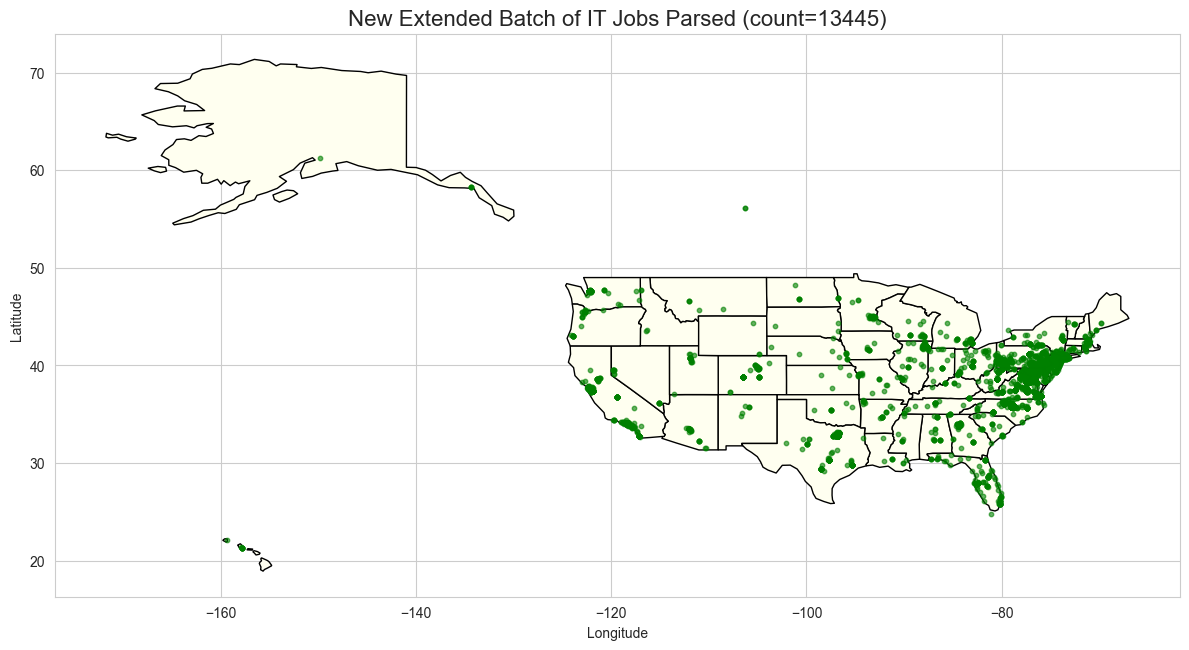

In [48]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Create a GeoDataFrame from the latitude and longitude columns
geometry = [Point(xy) for xy in zip(df1['job_longitude'], df1['job_latitude'])]
geo_df = gpd.GeoDataFrame(df1, geometry=geometry)

# Load the world map from the manually downloaded file
world = gpd.read_file('data/110m_cultural/ne_110m_admin_1_states_provinces.shp')  # Update with the correct path

# Plot the map and the job locations
plt.figure(figsize=(12, 8))
world.plot(ax=plt.gca(), color='ivory', edgecolor='black')  # Set background to white with black borders
geo_df.plot(ax=plt.gca(), markersize=10, color='green', alpha=0.6)  # Set dots to blue

plt.title(f'New Extended Batch of IT Jobs Parsed (count={df.shape[0]})', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

In [121]:
## Job distribution by state

import matplotlib.pyplot as plt

state_agg = normalized_df.drop_duplicates(subset='job_id')['job_state'].value_counts().sort_values(ascending=False)
# Get top 10 states and calculate "Others"
top_10_states = state_agg.head(9)
others_sum = state_agg[9:].sum()
state_data = pd.concat([top_10_states, pd.Series({'Others': others_sum})])

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(state_data,
        labels=state_data.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Pastel1.colors)
plt.title('Job Distribution by State', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

,job_id,job_title,employer_name,employer_logo,employer_website,job_publisher,job_employment_type,job_employment_types,job_apply_link,job_apply_is_direct,...,job_max_salary,job_salary_period,job_highlights,job_onet_soc,job_onet_job_zone,category,search,file_name,cat_list,cat_cnt
35547,--Th--_gOlpUU5wgAAAAAA==,Senior AI & Data Engineer,bolsterup,https://encrypted-tbn0.gstatic.com/images?q=tb...,None,Built In,Full-time,[FULLTIME],https://builtin.com/job/senior-ai-data-enginee...,False,...,NaN,None,{},15111100.0,5.0,AI/ML,ai agents engineer,2_ai_ml.json,[AI/ML],1
37005,--_s00bW3f4qEpbHAAAAAA==,Sr. BI Developer,K&L Gates,https://encrypted-tbn0.gstatic.com/images?q=tb...,http://www.klgates.com/,LinkedIn,Full-time,[FULLTIME],https://www.linkedin.com/jobs/view/sr-bi-devel...,False,...,162000.0,YEAR,{'Qualifications': ['Possess extensive experie...,15119900.0,4.0,Data,bi business intelligence developer,1_data.json,[Data],1
36462,--kaUsaFmdrZQK16AAAAAA==,Senior Enterprise Applications and Data Architect,Fox Rothschild,https://encrypted-tbn0.gstatic.com/images?q=tb...,http://www.foxrothschild.com/,ZipRecruiter,Full-time,[FULLTIME],https://www.ziprecruiter.com/c/Fox-Rothschild/...,False,...,NaN,None,{'Qualifications': ['Minimum of ten years of e...,15119900.0,4.0,Data,data architect,1_data.json,[Data],1
36451,-0MHJrY-HKiuQpXDAAAAAA==,Enterprise Data Architect – Data Engineering,EisnerAmper LLP,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://www.eisneramper.com,Indeed,Full-time,[FULLTIME],https://www.indeed.com/viewjob?jk=0f81a24a7b56...,False,...,NaN,None,{'Qualifications': ['The ideal candidate will ...,15119900.0,4.0,Data,data architect,1_data.json,[Data],1
36238,-0QAS9MhFvXdUHuDAAAAAA==,Database Engineer Intermediate,Cone Health,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://www.conehealth.com,Cone Health,Full-time,[FULLTIME],https://gfj.conehealth.com/jobdetails/summerfi...,False,...,NaN,None,"{'Qualifications': ['Bachelor's Degree', '4 ye...",15114100.0,4.0,Data,database developer,1_data.json,[Data],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32018,zx2zj79vuUmRpSJNAAAAAA==,Global Supply Chain Enterprise Architect,Accenture,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://www.accenture.com,Indeed,Full-time,[FULLTIME],https://www.indeed.com/viewjob?jk=fb0f608591e3...,False,...,414000.0,YEAR,{'Qualifications': ['Minimum of 10 years exper...,13108100.0,4.0,Software,enterprise architect,1_software.json,[],0
11378,zxdN1dO8Qf2BHOXlAAAAAA==,Staff Blockchain Security Architect,New Jersey Staffing,None,None,Lensa,Full-time,[FULLTIME],https://lensa.com/job-v1/new-jersey-staffing/t...,False,...,NaN,None,{'Qualifications': ['We want someone who is ea...,15112200.0,4.0,Backend,rust developer,1_backend.json,[Backend],1
36069,zyD8pTiPQs6I80VlAAAAAA==,"Senior Data Engineer (Python, Scala, AWS Cloud)",Capital One,None,https://www.capitalone.com,IHire,Full-time,[FULLTIME],https://www.ihire.com/jobs/view/489813292?utm_...,False,...,NaN,None,"{'Qualifications': ['Bachelors Degree', 'At le...",15113200.0,4.0,Data,data engineer,1_data.json,[Data],1
35948,zyKPnLWGQ4586m2oAAAAAA==,Oracle DBA,TriOptus LLC,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://www.trioptus.com,ZipRecruiter,Contractor,[CONTRACTOR],https://www.ziprecruiter.com/c/TriOptus-LLC/Jo...,False,...,NaN,None,{'Qualifications': ['Expert experience adminis...,15114100.0,4.0,Data,database administrator or dba,1_data.json,[Data],1


In [120]:
import matplotlib.pyplot as plt

# Filter for rows with AI/ML skills
ai_jobs = normalized_df[normalized_df['ai_group_keywords'].map(len) > 0]

# Count occurrences of each AI/ML skill
ai_skill_counts = ai_jobs.explode('ai_group_keywords').drop_duplicates(subset=['job_id', 'ai_group_keywords']).value_counts()
print(ai_skill_counts.shape)
# Create a pie chart
plt.figure(figsize=(12, 8))
ai_skill_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors,  # Use a light colormap
    legend=False
)
plt.title('Distribution of AI/ML Skills in Job Postings', fontsize=16)
plt.ylabel('')  # Remove y-axis label
plt.tight_layout()
plt.show()

,job_id,job_title,employer_name,employer_logo,employer_website,job_publisher,job_employment_type,job_employment_types,job_apply_link,job_apply_is_direct,...,job_max_salary,job_salary_period,job_highlights,job_onet_soc,job_onet_job_zone,category,search,file_name,cat_list,cat_cnt
2449,FtNu0PPHsgDofjq_AAAAAA==,Cloud Security Engineer,G4i Staffing,None,https://govg4inc.com,ZipRecruiter,Full-time,[FULLTIME],https://www.ziprecruiter.com/c/G4i-Staffing/Jo...,False,...,NaN,None,{'Qualifications': ['An ability to get things ...,15112200.0,4.0,DevOps,cloud security engineer,3_devops.json,"[Cybersecurity, DevOps]",2
12596,FtNu0PPHsgDofjq_AAAAAA==,Security Engineer,Lams Technology LLC,None,None,Indeed,Full-time,[FULLTIME],https://www.indeed.com/viewjob?jk=fcafb150d587...,True,...,55.0,HOUR,{'Qualifications': ['The ideal candidate will ...,15112200.0,4.0,Cybersecurity,application security engineer,10_cybersecurity.json,"[Cybersecurity, DevOps]",2


(6,)


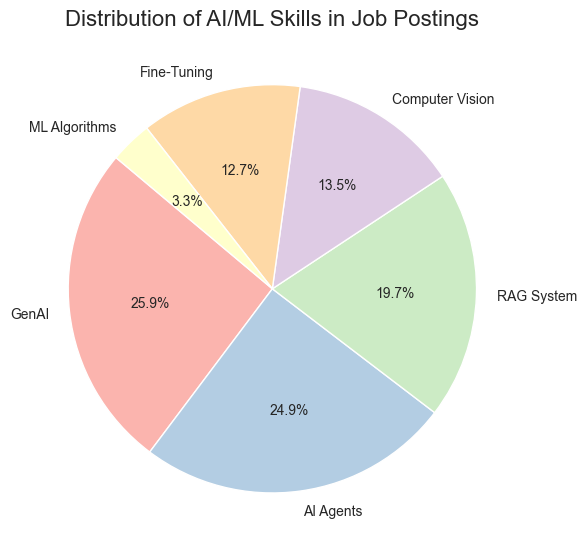

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of tech_keywords
keyword_counts = normalized_df['ai_keywords'].explode().value_counts()

# Convert to DataFrame for Seaborn
keyword_df = keyword_counts.head(40).reset_index()
keyword_df.columns = ['ai_keywords', 'count']

# Create a bar plot
plt.figure(figsize=(12, 16))
sns.set_style("darkgrid")
sns.barplot(data=keyword_df, x='count', y='ai_keywords', palette='viridis')
plt.title('Top 20 Tech Keywords by Count', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

/var/folders/x8/ps_xddr95734lgrb6gqpr7g80000gp/T/ipykernel_32185/652120624.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=keyword_df, x='count', y='ml_keywords', palette='viridis')


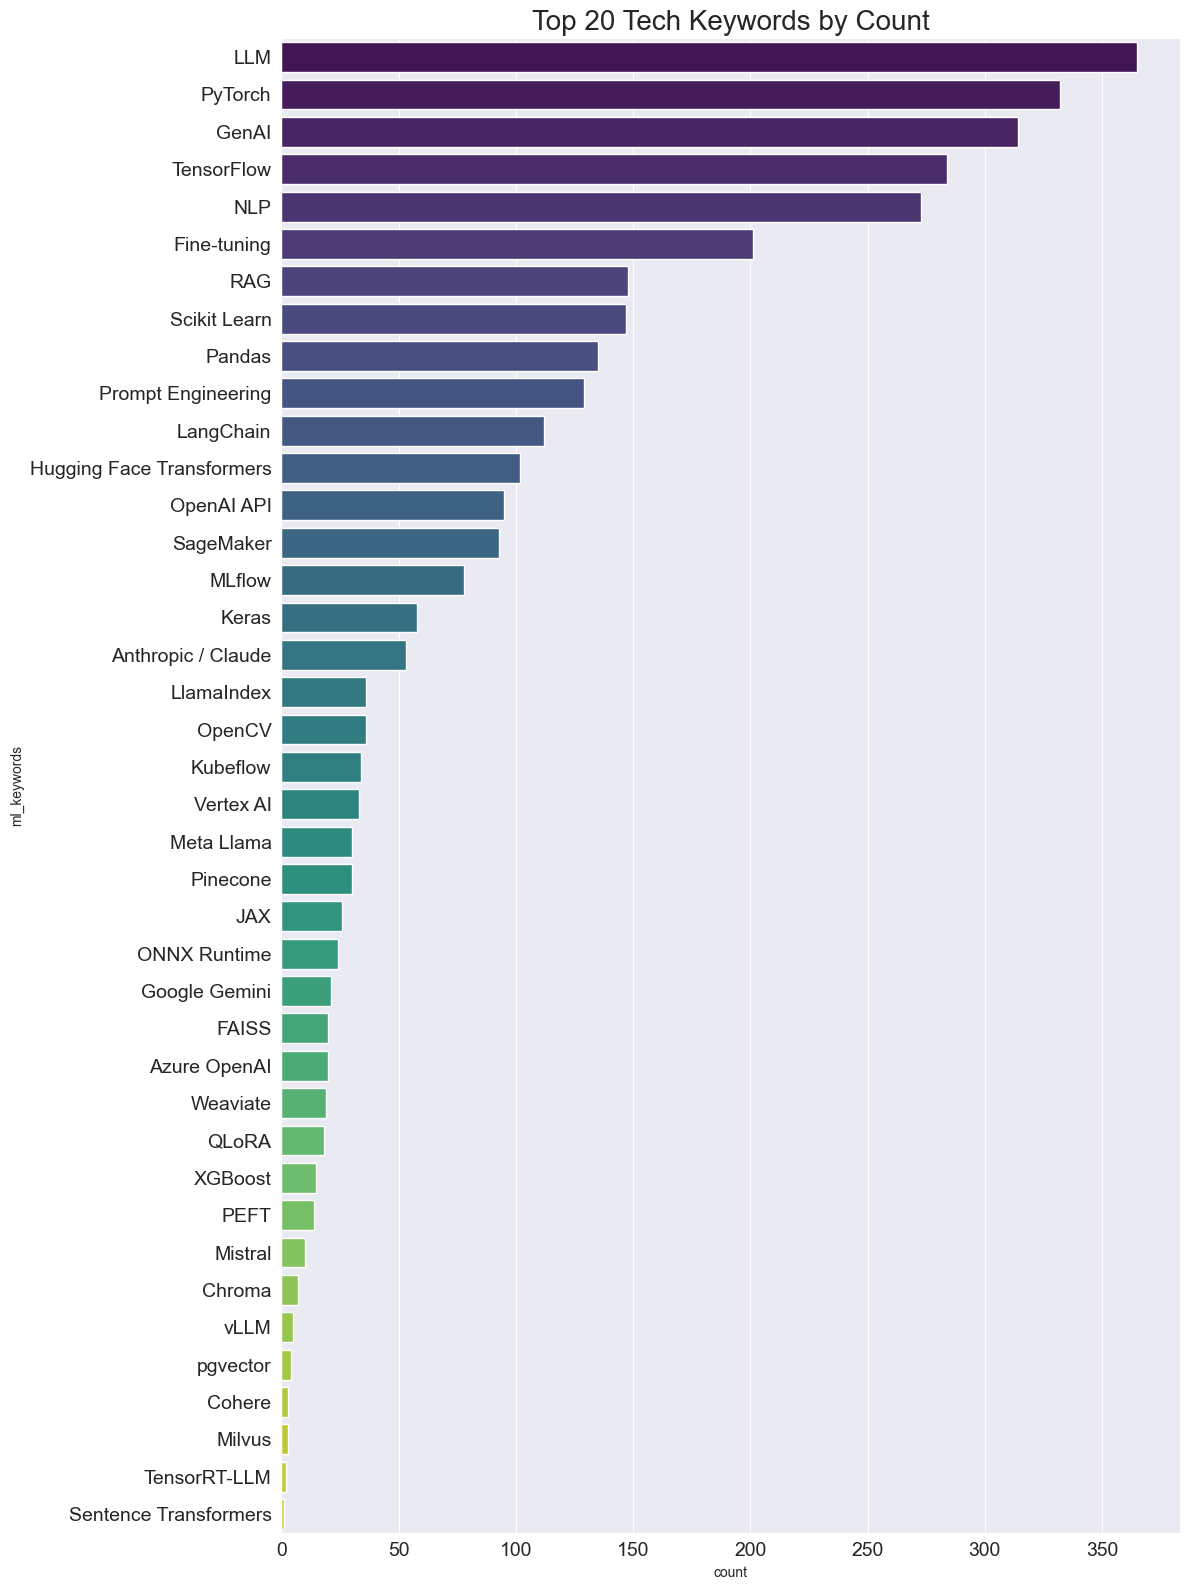

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 10 states and calculate "Others"
top_10_states = state_agg.head(20)
others_sum = state_agg[20:].sum()
state_data = pd.concat([top_10_states, pd.Series({'Others': others_sum})])

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=state_data.values,
            y=state_data.index,
            palette='Pastel1')

# Add percentage labels
total = state_data.sum()
for i, v in enumerate(state_data.values):
    percentage = v/total * 100
    plt.text(v, i, f'{percentage:.1f}%', va='center')

plt.title('Job Distribution by State', fontsize=16)
plt.xlabel('Number of Jobs')
plt.ylabel('State')
plt.tight_layout()
plt.show()

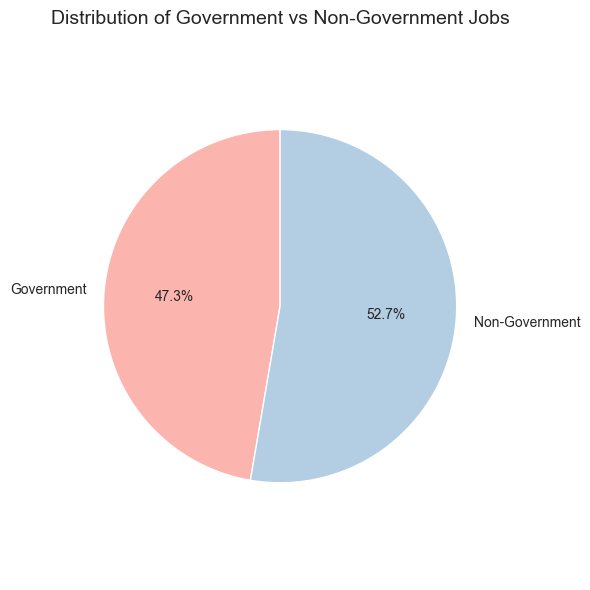

In [23]:
# Calculate government and non-government job counts
gov_jobs = (normalized_df["government"] > 0).sum()
non_gov_jobs = (normalized_df["government"] == 0).sum()

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie([gov_jobs, non_gov_jobs],
        labels=['Government', 'Non-Government'],
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Pastel1.colors)
plt.title('Distribution of Government vs Non-Government Jobs', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

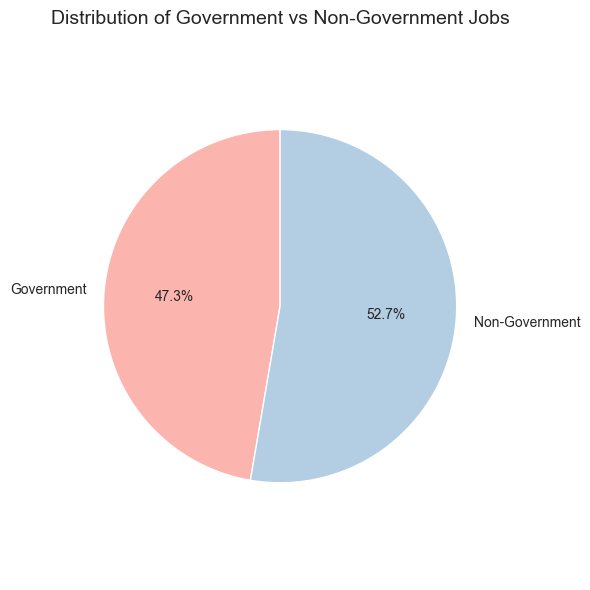

In [1]:
from pipeline.rapidapi_client import RapidApiClient

AI_MAP = {
    'ai/ml': [
    'ai agents engineer',
    'computer vision engineer',
    'data scientist',
    'deep learning engineer',
    'gen ai engineer',
    'llm engineer',
    'machine learning engineer',
    'mlops engineer',
    'nlp engineer',
    'ai/ml engineer'
],
    'data': [
        'big data architect',
        'kafka java engineer',
        'spark scala engineer',
        'spark java engineer'
    ]
}
r = RapidApiClient(AI_MAP)
r.fetch_jobs()
print(f"Total API calls: {r.calls_num}")

ai/ml - ai agents engineer
https://jsearch.p.rapidapi.com/search
fetch 1: 59
https://jsearch.p.rapidapi.com/search
fetch 2: 45
https://jsearch.p.rapidapi.com/search
fetch 3: 39
https://jsearch.p.rapidapi.com/search
fetch 4: 26
https://jsearch.p.rapidapi.com/search
fetch 5: 19
https://jsearch.p.rapidapi.com/search
fetch 6: 9
https://jsearch.p.rapidapi.com/search
fetch 7: 0
(61, 33)
ai/ml - computer vision engineer
https://jsearch.p.rapidapi.com/search
fetch 1: 50
https://jsearch.p.rapidapi.com/search
fetch 2: 44
https://jsearch.p.rapidapi.com/search
fetch 3: 32
https://jsearch.p.rapidapi.com/search
fetch 4: 22
https://jsearch.p.rapidapi.com/search
fetch 5: 14
https://jsearch.p.rapidapi.com/search
fetch 6: 4
https://jsearch.p.rapidapi.com/search
fetch 7: 0
(54, 33)
ai/ml - data scientist
https://jsearch.p.rapidapi.com/search
fetch 1: 154
https://jsearch.p.rapidapi.com/search
fetch 2: 147
https://jsearch.p.rapidapi.com/search
fetch 3: 134
https://jsearch.p.rapidapi.com/search
fetch 4: 131

/Users/apoltavets/anna-apps/annalyticai/labor-market/pipeline/rapidapi_client.py:57: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  x1.to_json(output_path, orient='records', lines=True)


fetch 1: 148
https://jsearch.p.rapidapi.com/search
fetch 2: 131
https://jsearch.p.rapidapi.com/search
fetch 3: 126
https://jsearch.p.rapidapi.com/search
fetch 4: 115
https://jsearch.p.rapidapi.com/search
fetch 5: 107
https://jsearch.p.rapidapi.com/search
fetch 6: 97
https://jsearch.p.rapidapi.com/search
fetch 7: 88
https://jsearch.p.rapidapi.com/search
fetch 8: 75
https://jsearch.p.rapidapi.com/search
fetch 9: 68
https://jsearch.p.rapidapi.com/search
fetch 10: 59
https://jsearch.p.rapidapi.com/search
fetch 11: 49
https://jsearch.p.rapidapi.com/search
fetch 12: 39
https://jsearch.p.rapidapi.com/search
fetch 13: 28
https://jsearch.p.rapidapi.com/search
fetch 14: 19
https://jsearch.p.rapidapi.com/search
fetch 15: 9
https://jsearch.p.rapidapi.com/search
fetch 16: 0
(150, 33)
ai/ml - mlops engineer
https://jsearch.p.rapidapi.com/search
fetch 1: 29
https://jsearch.p.rapidapi.com/search
fetch 2: 19
https://jsearch.p.rapidapi.com/search
fetch 3: 10
https://jsearch.p.rapidapi.com/search
fetch 4

/Users/apoltavets/anna-apps/annalyticai/labor-market/pipeline/rapidapi_client.py:57: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  x1.to_json(output_path, orient='records', lines=True)


fetch 1: 138
https://jsearch.p.rapidapi.com/search
fetch 2: 129
https://jsearch.p.rapidapi.com/search
fetch 3: 113
https://jsearch.p.rapidapi.com/search
fetch 4: 102
https://jsearch.p.rapidapi.com/search
fetch 5: 99
https://jsearch.p.rapidapi.com/search
fetch 6: 84
https://jsearch.p.rapidapi.com/search
fetch 7: 79
https://jsearch.p.rapidapi.com/search
fetch 8: 69
https://jsearch.p.rapidapi.com/search
fetch 9: 59
https://jsearch.p.rapidapi.com/search
fetch 10: 49
https://jsearch.p.rapidapi.com/search
fetch 11: 39
https://jsearch.p.rapidapi.com/search
fetch 12: 29
https://jsearch.p.rapidapi.com/search
fetch 13: 19
https://jsearch.p.rapidapi.com/search
fetch 14: 9
https://jsearch.p.rapidapi.com/search
fetch 15: 0
(142, 33)
data - big data architect
https://jsearch.p.rapidapi.com/search
fetch 1: 17
https://jsearch.p.rapidapi.com/search
fetch 2: 7
https://jsearch.p.rapidapi.com/search
fetch 3: 0
(17, 33)
data - kafka java engineer
https://jsearch.p.rapidapi.com/search
fetch 1: 23
https://js

In [6]:
from pipeline.rapid_transformer import RapidTransformer
FOLDER = '20250916-2212'
rt = RapidTransformer(FOLDER)
rt.extract_transform_load()

(788, 34)
Normalizing job_highlights...
(689, 8)
Parsing keywords...
(788, 31)


AttributeError: 'RapidTransformer' object has no attribute 'description_df'

In [7]:
descriptions = rt.job_df.merge(rt.desc_df, on='job_description_id', how='left')
descriptions

,job_id,job_title_x,employer_name,employer_logo,employer_website,job_publisher,job_employment_type,job_employment_types,job_apply_link,job_apply_is_direct,...,category,search,tech_keywords,ml_keywords,devops_keywords,cloud_keywords,ai_group_keywords,qual_keywords,cert_keywords,gov_keywords
0,iTqSkvcFkENdxqP4AAAAAA==,"Data Scientist, People Experience and Technolo...",Amazon.com Services LLC,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://www.amazon.com,Indeed,Full-time,[FULLTIME],https://www.indeed.com/viewjob?jk=52afd42649b7...,False,...,ai/ml,data scientist,"[Computer Vision, Hadoop, Python, Scala, Spark...",[],[],[],[Computer Vision],"[AI_ML, Data_ETL, Qualifications]",[],[]
1,3ba-7Frs-u_8M8dzAAAAAA==,Data Scientist,Exiger,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://exiger.com,Indeed,Full-time,[FULLTIME],https://www.indeed.com/viewjob?jk=00215e8332bc...,True,...,ai/ml,data scientist,"[Fine-tuning, Fine-Tuning, GenAI, LLM, NLP, Pa...","[Fine-tuning, LLM, NLP, Pandas, PyTorch, Sciki...",[],[],"[Fine-Tuning, GenAI]","[AI_ML, Data_ETL, Qualifications, Testing_Tools]",[],[Government Job]
2,il1_VQ6wg37UdR26AAAAAA==,"Business Data Scientist, Machine Learning",Google,https://encrypted-tbn0.gstatic.com/images?q=tb...,None,LinkedIn,Full-time,[FULLTIME],https://www.linkedin.com/jobs/view/business-da...,False,...,ai/ml,data scientist,"[C, Go, Python, SQL]",[],[],[],[],"[AI_ML, Data_ETL, Qualifications]",[],[]
3,ncQNtIkT8Q5NjqAcAAAAAA==,"Data Scientist, Product - Full-time",Meta,None,https://www.meta.com,Snagajob,Full-time,[FULLTIME],https://www.snagajob.com/jobs/1140898651?utm_c...,False,...,ai/ml,data scientist,"[ETL, Hadoop, PHP, Python, SQL]",[],[],[],[],"[AI_ML, Data_ETL, Qualifications]",[],[Government Job]
4,jYyVDdeKbYQ6ig43AAAAAA==,Cleared - Data Scientist (Multiple Levels),Noblis,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://noblis.org,Indeed,Full-time,[FULLTIME],https://www.indeed.com/viewjob?jk=57e80bcc283f...,False,...,ai/ml,data scientist,"[ETL, Fine-tuning, Fine-Tuning, Python, SQL]",[Fine-tuning],[],[],[Fine-Tuning],"[Agile_Methods, Data_ETL, Microservices_API, Q...",[],[Government Job]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,AYC0NAeAGTqR7cOTAAAAAA==,AI & Machine Learning Engineer - Manager - Con...,EY,https://encrypted-tbn0.gstatic.com/images?q=tb...,None,LinkedIn,Full-time,[FULLTIME],https://www.linkedin.com/jobs/view/ai-machine-...,False,...,ai/ml,data scientist,"[Azure, Azure DevOps, C, CI/CD, Computer Visio...","[Fine-tuning, GenAI, LangChain, LlamaIndex, LL...",[CI/CD],"[Azure, Azure DevOps]","[Computer Vision, Fine-Tuning, GenAI, RAG System]","[Agile_Methods, AI_ML, Cloud, Data_ETL, Fronte...",[],[]
784,vPYrYL0SKx9zSeRLAAAAAA==,AI & Machine Learning Engineer - Manager - Con...,EY,https://encrypted-tbn0.gstatic.com/images?q=tb...,None,LinkedIn,Full-time,[FULLTIME],https://www.linkedin.com/jobs/view/ai-machine-...,False,...,ai/ml,data scientist,"[Azure, Azure DevOps, C, CI/CD, Computer Visio...","[Fine-tuning, GenAI, LangChain, LlamaIndex, LL...",[CI/CD],"[Azure, Azure DevOps]","[Computer Vision, Fine-Tuning, GenAI, RAG System]","[Agile_Methods, AI_ML, Cloud, Data_ETL, Fronte...",[],[]
785,IiLfuoT47ec0uuL4AAAAAA==,Senior AI Developer,Athena,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://www.athena.com,LinkedIn,Full-time,[FULLTIME],https://www.linkedin.com/jobs/view/senior-ai-d...,False,...,ai/ml,ai/ml engineer,"[AI Agents, AWS Athena, Computer Vision, Fine-...","[Fine-tuning, LLM, OpenAI API, Prompt Engineer...",[],[AWS Athena],"[AI Agents, Computer Vision, Fine-Tuning, GenA...","[AI_ML, Frontend, Qualifications]",[],[]
786,fEHTpNiN5wkQFAE-AAAAAA==,"Lead ML Engineer, Recommendation Systems",Launch Potato,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://launchpotato.com,LinkedIn,Full-time,[FULLTIME],https://www.linkedin.com/jobs/view/lead-ml-eng...,False,...,ai/ml,ai/ml engineer,"[AI Agents, AWS Redshift, BigQue

In [9]:
descriptions[['job_description_id', 'job_title_x', 'employer_name', 'job_posted_at', 'job_state', 'job_min_salary', 'job_max_salary', 'qualifications', 'responsibilities', 'tech_keywords']].sort_values(by='job_posted_at')

,job_description_id,job_title_x,employer_name,job_posted_at,job_state,job_min_salary,job_max_salary,qualifications,responsibilities,tech_keywords
720,013c5a4d79b6c722de1f055224b1b24b,Senior Machine Learning Engineer,Qualtrics,1 day ago,Washington,NaN,NaN,[Crafting systems in an agile environment to w...,[You should love building simple solutions to ...,"[C, Java, Python, PyTorch, REST, TensorFlow]"
246,eb44b6fe138ed1f44da4925fa2cb1c4c,Senior Machine Learning Engineer- Machine Lear...,Visa,1 day ago,California,NaN,NaN,[2 or more years of work experience with a Bac...,[We enable the training of statistical and mac...,"[Go, Kubernetes, ML Algorithms, Python, Spark,..."
264,8fe92bd486a7a37671a265eb95a290ef,Computer Vision Engineer,CyberCoders,1 day ago,Massachusetts,100000.0,150000.0,"[Requirements: 2+ years 2D CV & ML experience,...",[Develop and implement ML/computer vision mode...,"[Computer Vision, Fine-tuning, Fine-Tuning, Ke..."
533,bebca0897365f327d5a1c5575d568eba,Senior Security Agent Engineer / Startup / AI,Motion Recruitment,1 day ago,Massachusetts,NaN,NaN,"[Ideal candidates have experience with LLMs, a...",[They build SaaS products that help security t...,"[AI Agents, AWS, Azure, C, GenAI, LangChain, L..."
651,ef99bc89d26463fedda6c584d7a2200a,NLP LLM Operations Architect & AWS Engineer,Norstella,1 day ago,Oklahoma,NaN,NaN,"[Bachelor’s or master’s in computer science, D...",[Citeline – accelerate the drug development cy...,"[AWS, GenAI, Hugging Face Transformers, LLM, M..."
...,...,...,...,...,...,...,...,...,...,...
400,6041af01a9c41d9439208b9b8f4cfc55,Senior Data Science / LLM Engineer (Fine-tunin...,Jobot,9 days ago,Pennsylvania,NaN,NaN,[The successful candidate will play a key role...,"[Design, develop, and implement advanced AI an...","[Fine-tuning, Fine-Tuning, GenAI, LLM, Python]"
620,e1d2ea010563dfe481219c8172b2bc24,Senior AI Engineer – Machine Learning & LLM Sy...,Mogi I/O : OTT/Podcast/Short Video Apps for you,9 days ago,Texas,NaN,NaN,[Experience Required: 8+ years software engine...,[Join as a Senior AI Engineer leading the arch...,"[Anthropic / Claude, AWS, Cohere, Computer Vis..."
21,161cbc87d10e62ba82284f104f1bb2d4,"Senior Manager, Data Science | McLean, VA, USA",Capital One,9 days ago,Virginia,NaN,NaN,[You stay current on published state-of-the-ar...,[Partner with a cross-functional team of data ...,"[AWS, Python, Scala, Spark]"
393,52deeff50b650b18010717566bbed612,Software Engineer - Cortex Apps (LLM Products),Snowflake,9 days ago,California,NaN,NaN,"[Bachelor’s degree in Computer Science, Engine...",[You'll own the full AI engineering lifecycle:...,"[AI Agents, GenAI, Python, RAG System, Snowfla..."
